# Notebook

Notebook zawiera zarówno część praktyczną i teoretyczną. Do jego uruchomienia należy użyć Azure Data Studio

In [44]:
USE GraphDemo;

Commands completed successfully.

Total execution time: 00:00:00

# 1. Bazy grafowe w Microsoft SQL Server 2022

Istnieje wsparcie dla grafowych baz danych od SQL Server 2017 (14.x) i późniejszych wersji. Korzysta ono z Transact-SQL.
Jest nakładką na klasyczną relacyjną bazę danych, która ułatwia korzystanie z danych grafowych i hierarchicznych.

Podejście grafowe sprowadza się do wykorzystania dotychczasowych mechanizmów relacyjnej bazy danych SQL.

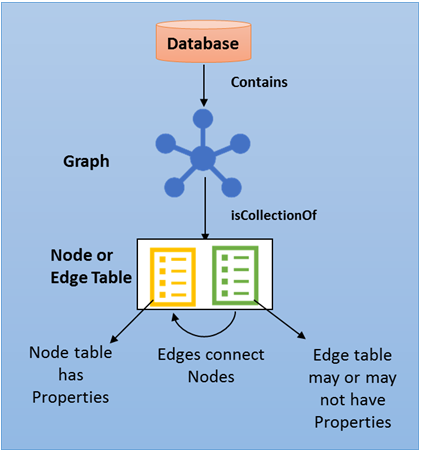

Realizje się grafy, poprzez tabele typu `NODE` i `EDGE`, które zawierają dodatkowe kolumny dotyczące struktury grafu: np. skąd, dokąd prowadzi krawędź.

Zobaczmy jak wygląda tabela, która będzie reprezentowała wierzchołki i krawędzie. Stwórzmy przykładowe dane grafowe.

In [45]:
CREATE TABLE Person (
  ID INTEGER PRIMARY KEY,
  name VARCHAR(100)
) AS NODE;

CREATE TABLE Restaurant (
  ID INTEGER NOT NULL,
  name VARCHAR(100),
  city VARCHAR(100)
) AS NODE;

CREATE TABLE City (
  ID INTEGER PRIMARY KEY,
  name VARCHAR(100),
  stateName VARCHAR(100)
) AS NODE;


CREATE TABLE Bank (
  ID INTEGER PRIMARY KEY,
  name VARCHAR(100)
) AS NODE;


CREATE TABLE likes (rating INTEGER) AS EDGE;
CREATE TABLE friendOf AS EDGE;
CREATE TABLE livesIn AS EDGE;
CREATE TABLE locatedIn AS EDGE;
CREATE TABLE owesMoney (debt INTEGER) AS EDGE;

INSERT INTO Person (ID, name)
	VALUES (1, 'John')
		 , (2, 'Mary')
		 , (3, 'Alice')
		 , (4, 'Jacob')
		 , (5, 'Julie')
		 , (6, 'Adam Zadłużony');

INSERT INTO Bank (ID, name)
	VALUES (1, 'KRK Bank')
		 , (2, 'WAW Bank');

INSERT INTO Restaurant (ID, name, city)
	VALUES (1, 'Taco Dell','Bellevue')
		 , (2, 'Ginger and Spice','Seattle')
		 , (3, 'Noodle Land', 'Redmond');

INSERT INTO City (ID, name, stateName)
	VALUES (1,'Bellevue','WA')
		 , (2,'Seattle','WA')
		 , (3,'Redmond','WA');


INSERT INTO likes
	VALUES ((SELECT $node_id FROM Person WHERE ID = 1), (SELECT $node_id FROM Restaurant WHERE ID = 1), 9)
		 , ((SELECT $node_id FROM Person WHERE ID = 2), (SELECT $node_id FROM Restaurant WHERE ID = 2), 9)
		 , ((SELECT $node_id FROM Person WHERE ID = 3), (SELECT $node_id FROM Restaurant WHERE ID = 3), 9)
		 , ((SELECT $node_id FROM Person WHERE ID = 4), (SELECT $node_id FROM Restaurant WHERE ID = 3), 9)
		 , ((SELECT $node_id FROM Person WHERE ID = 5), (SELECT $node_id FROM Restaurant WHERE ID = 3), 9);

INSERT INTO livesIn
	VALUES ((SELECT $node_id FROM Person WHERE ID = 1), (SELECT $node_id FROM City WHERE ID = 1))
		 , ((SELECT $node_id FROM Person WHERE ID = 2), (SELECT $node_id FROM City WHERE ID = 2))
		 , ((SELECT $node_id FROM Person WHERE ID = 3), (SELECT $node_id FROM City WHERE ID = 3))
		 , ((SELECT $node_id FROM Person WHERE ID = 4), (SELECT $node_id FROM City WHERE ID = 3))
		 , ((SELECT $node_id FROM Person WHERE ID = 5), (SELECT $node_id FROM City WHERE ID = 1));

INSERT INTO locatedIn
	VALUES ((SELECT $node_id FROM Restaurant WHERE ID = 1), (SELECT $node_id FROM City WHERE ID =1))
		 , ((SELECT $node_id FROM Restaurant WHERE ID = 2), (SELECT $node_id FROM City WHERE ID =2))
		 , ((SELECT $node_id FROM Restaurant WHERE ID = 3), (SELECT $node_id FROM City WHERE ID =3));

INSERT INTO friendOf
	VALUES ((SELECT $NODE_ID FROM Person WHERE ID = 1), (SELECT $NODE_ID FROM Person WHERE ID = 2))
		 , ((SELECT $NODE_ID FROM Person WHERE ID = 2), (SELECT $NODE_ID FROM Person WHERE ID = 3))
		 , ((SELECT $NODE_ID FROM Person WHERE ID = 3), (SELECT $NODE_ID FROM Person WHERE ID = 1))
		 , ((SELECT $NODE_ID FROM Person WHERE ID = 4), (SELECT $NODE_ID FROM Person WHERE ID = 2))
		 , ((SELECT $NODE_ID FROM Person WHERE ID = 5), (SELECT $NODE_ID FROM Person WHERE ID = 4));

INSERT INTO owesMoney
	VALUES ((SELECT $node_id FROM Person WHERE ID = 6), (SELECT $node_id FROM Bank WHERE ID = 1), 1000)
		, ((SELECT $node_id FROM Person WHERE ID = 6), (SELECT $node_id FROM Person WHERE ID = 5), 12)
		, ((SELECT $node_id FROM Person WHERE ID = 6), (SELECT $node_id FROM Bank WHERE ID = 2), 2000)
		,  ((SELECT $node_id FROM Person WHERE ID = 6), (SELECT $node_id FROM Person WHERE ID = 1), 100)
		,  ((SELECT $node_id FROM Person WHERE ID = 6), (SELECT $node_id FROM Person WHERE ID = 2), 300)
		, ((SELECT $node_id FROM Bank WHERE ID = 2), (SELECT $node_id FROM Bank WHERE ID = 1), 5000000);

(6 rows affected)

(2 rows affected)

(3 rows affected)

(3 rows affected)

(5 rows affected)

(5 rows affected)

(3 rows affected)

(5 rows affected)

(6 rows affected)

Total execution time: 00:00:00.122

In [46]:
SELECT * FROM Person;

(6 rows affected)

Total execution time: 00:00:00.012

$node_id_DF9F4FCEC7F34E3AB42BD426F8D72A20,ID,name
"{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":0}",1,John
"{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":1}",2,Mary
"{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":2}",3,Alice
"{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":3}",4,Jacob
"{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":4}",5,Julie
"{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}",6,Adam Zadluzony


In [47]:
SELECT * FROM likes;

(5 rows affected)

Total execution time: 00:00:00.013

$edge_id_157DC34079E3479E9CD598F5709B7572,$from_id_306C7F2B0DFB425BBB6BFBA5325C2E0A,$to_id_DE0DA7FD18AB4E20BC2B354CF6E9629E,rating
"{""type"":""edge"",""schema"":""dbo"",""table"":""likes"",""id"":0}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":0}","{""type"":""node"",""schema"":""dbo"",""table"":""Restaurant"",""id"":0}",9
"{""type"":""edge"",""schema"":""dbo"",""table"":""likes"",""id"":1}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":1}","{""type"":""node"",""schema"":""dbo"",""table"":""Restaurant"",""id"":1}",9
"{""type"":""edge"",""schema"":""dbo"",""table"":""likes"",""id"":2}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":2}","{""type"":""node"",""schema"":""dbo"",""table"":""Restaurant"",""id"":2}",9
"{""type"":""edge"",""schema"":""dbo"",""table"":""likes"",""id"":3}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":3}","{""type"":""node"",""schema"":""dbo"",""table"":""Restaurant"",""id"":2}",9
"{""type"":""edge"",""schema"":""dbo"",""table"":""likes"",""id"":4}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":4}","{""type"":""node"",""schema"":""dbo"",""table"":""Restaurant"",""id"":2}",9


In [48]:
SELECT QUOTENAME(SCHEMA_NAME(tab.schema_id)) as SchemaName, 
	QUOTENAME(OBJECT_NAME(tab.object_id)) as TableName, 
	cols.name as ColumnName,
	t.name as DataType,
	cols.graph_type,
	cols.graph_type_desc,
	cols.*
	from sys.all_columns cols
		inner join sys.tables tab
			ON tab.object_id = cols.object_id
		INNER JOIN sys.types t
			ON cols.user_type_id = t.user_type_id
	WHERE QUOTENAME(OBJECT_NAME(tab.object_id))='[Person]'
	ORDER BY SchemaName, TableName

(4 rows affected)

Total execution time: 00:00:00.201

SchemaName,TableName,ColumnName,DataType,graph_type,graph_type_desc,object_id,name,column_id,system_type_id,user_type_id,max_length,precision,scale,collation_name,is_nullable,is_ansi_padded,is_rowguidcol,is_identity,is_computed,is_filestream,is_replicated,is_non_sql_subscribed,is_merge_published,is_dts_replicated,is_xml_document,xml_collection_id,default_object_id,rule_object_id,is_sparse,is_column_set,generated_always_type,generated_always_type_desc,encryption_type,encryption_type_desc,encryption_algorithm_name,column_encryption_key_id,column_encryption_key_database_name,is_hidden,is_masked,graph_type,graph_type_desc,is_data_deletion_filter_column,ledger_view_column_type,ledger_view_column_type_desc,is_dropped_ledger_column
[dbo],[Person],graph_id_96C8B3414C1A4E428D2A25784482BC48,bigint,1,GRAPH_ID,1570104634,graph_id_96C8B3414C1A4E428D2A25784482BC48,1,127,127,8,19,0,NULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,1,0,1,GRAPH_ID,0,NULL,NULL,0
[dbo],[Person],$node_id_DF9F4FCEC7F34E3AB42BD426F8D72A20,nvarchar,2,GRAPH_ID_COMPUTED,1570104634,$node_id_DF9F4FCEC7F34E3AB42BD426F8D72A20,2,231,231,2000,0,0,Latin1_General_CI_AS,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,0,0,2,GRAPH_ID_COMPUTED,0,NULL,NULL,0
[dbo],[Person],ID,int,NULL,NULL,1570104634,ID,3,56,56,4,10,0,NULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,0,0,NULL,NULL,0,NULL,NULL,0
[dbo],[Person],name,varchar,NULL,NULL,1570104634,name,4,167,167,100,0,0,Latin1_General_CI_AS,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,0,0,NULL,NULL,0,NULL,NULL,0


In [49]:
SELECT QUOTENAME(SCHEMA_NAME(tab.schema_id)) as SchemaName, 
	QUOTENAME(OBJECT_NAME(tab.object_id)) as TableName, 
	cols.name as ColumnName,
	t.name as DataType,
	cols.graph_type,
	cols.graph_type_desc,
	cols.*
	from sys.all_columns cols
		inner join sys.tables tab
			ON tab.object_id = cols.object_id
		INNER JOIN sys.types t
			ON cols.user_type_id = t.user_type_id
	WHERE QUOTENAME(OBJECT_NAME(tab.object_id))='[likes]'
	ORDER BY SchemaName, TableName;

(9 rows affected)

Total execution time: 00:00:00.271

SchemaName,TableName,ColumnName,DataType,graph_type,graph_type_desc,object_id,name,column_id,system_type_id,user_type_id,max_length,precision,scale,collation_name,is_nullable,is_ansi_padded,is_rowguidcol,is_identity,is_computed,is_filestream,is_replicated,is_non_sql_subscribed,is_merge_published,is_dts_replicated,is_xml_document,xml_collection_id,default_object_id,rule_object_id,is_sparse,is_column_set,generated_always_type,generated_always_type_desc,encryption_type,encryption_type_desc,encryption_algorithm_name,column_encryption_key_id,column_encryption_key_database_name,is_hidden,is_masked,graph_type,graph_type_desc,is_data_deletion_filter_column,ledger_view_column_type,ledger_view_column_type_desc,is_dropped_ledger_column
[dbo],[likes],graph_id_A149424C276E4FF6957E93877521C6D4,bigint,1,GRAPH_ID,1682105033,graph_id_A149424C276E4FF6957E93877521C6D4,1,127,127,8,19,0,NULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,1,0,1,GRAPH_ID,0,NULL,NULL,0
[dbo],[likes],$edge_id_157DC34079E3479E9CD598F5709B7572,nvarchar,2,GRAPH_ID_COMPUTED,1682105033,$edge_id_157DC34079E3479E9CD598F5709B7572,2,231,231,2000,0,0,Latin1_General_CI_AS,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,0,0,2,GRAPH_ID_COMPUTED,0,NULL,NULL,0
[dbo],[likes],from_obj_id_81FC12A2CA8649E78531AE7B9562CE7E,int,4,GRAPH_FROM_OBJ_ID,1682105033,from_obj_id_81FC12A2CA8649E78531AE7B9562CE7E,3,56,56,4,10,0,NULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,1,0,4,GRAPH_FROM_OBJ_ID,0,NULL,NULL,0
[dbo],[likes],from_id_90471B5243ED44C48F5BF530E18FD354,bigint,3,GRAPH_FROM_ID,1682105033,from_id_90471B5243ED44C48F5BF530E18FD354,4,127,127,8,19,0,NULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,1,0,3,GRAPH_FROM_ID,0,NULL,NULL,0
[dbo],[likes],$from_id_306C7F2B0DFB425BBB6BFBA5325C2E0A,nvarchar,5,GRAPH_FROM_ID_COMPUTED,1682105033,$from_id_306C7F2B0DFB425BBB6BFBA5325C2E0A,5,231,231,2000,0,0,Latin1_General_CI_AS,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,0,0,5,GRAPH_FROM_ID_COMPUTED,0,NULL,NULL,0
[dbo],[likes],to_obj_id_75B0E5E9A0DF4097B5E9EB9E4F9284EC,int,7,GRAPH_TO_OBJ_ID,1682105033,to_obj_id_75B0E5E9A0DF4097B5E9EB9E4F9284EC,6,56,56,4,10,0,NULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,1,0,7,GRAPH_TO_OBJ_ID,0,NULL,NULL,0
[dbo],[likes],to_id_0F16ACCD323E462EB4A9B4DBC4A60CDF,bigint,6,GRAPH_TO_ID,1682105033,to_id_0F16ACCD323E462EB4A9B4DBC4A60CDF,7,127,127,8,19,0,NULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,1,0,6,GRAPH_TO_ID,0,NULL,NULL,0
[dbo],[likes],$to_id_DE0DA7FD18AB4E20BC2B354CF6E9629E,nvarchar,8,GRAPH_TO_ID_COMPUTED,1682105033,$to_id_DE0DA7FD18AB4E20BC2B354CF6E9629E,8,231,231,2000,0,0,Latin1_General_CI_AS,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,0,0,8,GRAPH_TO_ID_COMPUTED,0,NULL,NULL,0
[dbo],[likes],rating,int,NULL,NULL,1682105033,rating,9,56,56,4,10,0,NULL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_APPLICABLE,NULL,NULL,NULL,NULL,NULL,0,0,NULL,NULL,0,NULL,NULL,0


## AS NODE 
Dokłada 2 kolumny:
- `graph_id` - wewnetrzna SQL Serwerowa kolumna, nie da sie po niej prowadzic zapytan
- `node_id` - id wierzchołka grafu

## AS EDGE

Będzie miała 8 domyślnych kolumn, które zostaną automatycznie dodane dla każdej utworzonej tabeli, z czego tylko 3 z nich będą automatycznie widoczne w każdym zapytaniu. Reszta będzie ukryta.

- `graph_id_<hex_string>` - wewnętrzna kolumna `graph_id` grafu (obecnie możemy mieć tylko jeden graf na bazę danych)
- `$edge_id_<hex_string>` - zewnętrzne `$edge_id`, które jednoznacznie identyfikuje krawędź (relację)
- `from_obj_id_<hex_string>` - przechowuje `object_id` węzła FROM
- `from_id_<hex_string>` - przechowuje `graph_id` węzła FROM
- `$from_id_<hex_string>` - przechowuje `node_id` węzła FROM
- `to_obj_id_<hex_string>` - przechowuje `object_id` węzła TO
- `to_id_<hex_string>` - przechowuje `graph_id` węzła TO
- `$to_id_<hex_string>` - przechowuje `node_id` węzła TO

# 2. Ograniczenia

Warto mieć na uwadze, że nie wszystkie mechanizmy dostępne dla klasycznych tabel są dostępne dla tabel grafowych.

Następujące typy tabel nie mogą być używane jako tabele typu NODE lub EDGE:​

- Tabele tymczasowe

- Tabele temporalne - śledzące zmiany danych​

- Tabele zoptymalizowane pamięciowo - wydajniejsze, używające pamięci RAM​

Nie można aktualizować wierzchołków w tabeli EDGE poprzez klasyczne UPDATE, trzeba usunąć a potem dodać nową krawędź​

Zapytania między bazami danych dla obiektów grafowych nie są wspierane​

Brak listy sąsiedztw dla wierzchołków

## 2.1 Tymczasowa tabela

In [50]:
CREATE TABLE #TempPersonTable (
    PersonID int PRIMARY KEY IDENTITY(1,1),
    LastName varchar(255),
    FirstName varchar(255),
    City varchar(255)
) AS NODE;

: Msg 13914, Level 16, State 1, Line 1
Cannot create a node or edge table as a temporary table.

Total execution time: 00:00:00.066

## 2.2 UPDATE dla grafu

Korzystanie z modelu relacyjnego pozwala nam traktować graf podobnie jak byśmy dokonywali operacji na bazie danej relacyjnej. Są jednak różnice, o których warto pamiętać.

Spróbujmy podmienić wszystkie like by prowadziły do jednej restauracji.

In [51]:
SELECT * FROM likes;

(5 rows affected)

Total execution time: 00:00:00.012

$edge_id_157DC34079E3479E9CD598F5709B7572,$from_id_306C7F2B0DFB425BBB6BFBA5325C2E0A,$to_id_DE0DA7FD18AB4E20BC2B354CF6E9629E,rating
"{""type"":""edge"",""schema"":""dbo"",""table"":""likes"",""id"":0}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":0}","{""type"":""node"",""schema"":""dbo"",""table"":""Restaurant"",""id"":0}",9
"{""type"":""edge"",""schema"":""dbo"",""table"":""likes"",""id"":1}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":1}","{""type"":""node"",""schema"":""dbo"",""table"":""Restaurant"",""id"":1}",9
"{""type"":""edge"",""schema"":""dbo"",""table"":""likes"",""id"":2}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":2}","{""type"":""node"",""schema"":""dbo"",""table"":""Restaurant"",""id"":2}",9
"{""type"":""edge"",""schema"":""dbo"",""table"":""likes"",""id"":3}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":3}","{""type"":""node"",""schema"":""dbo"",""table"":""Restaurant"",""id"":2}",9
"{""type"":""edge"",""schema"":""dbo"",""table"":""likes"",""id"":4}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":4}","{""type"":""node"",""schema"":""dbo"",""table"":""Restaurant"",""id"":2}",9


In [52]:
UPDATE likes
SET $to_id = '{"type":"edge","schema":"dbo","table":"likes","id":0}';

: Msg 271, Level 16, State 1, Line 1
The column "$to_id_DE0DA7FD18AB4E20BC2B354CF6E9629E" cannot be modified because it is either a computed column or is the result of a UNION operator.

Total execution time: 00:00:00.001

In [53]:
UPDATE likes
SET rating = 9;

(5 rows affected)

Total execution time: 00:00:00.008

**Nie możemy "przepinać" krawędzi z jednego wierzchołka na drugi.**

Nie ma z kolei problemów z modyfikacją danych relacji (rating).

Usuwanie z tabeli _NODE_ nie jest skomplikowane, skoro mamy do dyspozycji bezpośrednio klucz główny w postaci ID. _EDGE_ z kolei operuje na dodanych automatycznie kolumnach. Jak usunąć krawiędzie?

Spróbujmy usunąć zadłużenie na 12 zł Adama Zadłużonego u Julii.

In [54]:
SELECT * FROM owesMoney;

(6 rows affected)

Total execution time: 00:00:00.012

$edge_id_12BF2CC94F95480097BD317DA41D1E3A,$from_id_263E64A78C3D4A83A424781A3AFE4655,$to_id_2753265CACE94F8A90F3992F96FFA439,debt
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":0}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":0}",1000
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":1}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":4}",12
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":2}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":1}",2000
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":3}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":0}",100
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":4}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":1}",300
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":1}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":0}",5000000


In [55]:
DELETE owesMoney
WHERE $edge_id = 
   '{"type":"edge","schema":"dbo","table":"owesMoney","id":1}';

SELECT * FROM owesMoney;

(1 row affected)

(5 rows affected)

Total execution time: 00:00:00.014

$edge_id_12BF2CC94F95480097BD317DA41D1E3A,$from_id_263E64A78C3D4A83A424781A3AFE4655,$to_id_2753265CACE94F8A90F3992F96FFA439,debt
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":0}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":0}",1000
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":2}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":1}",2000
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":3}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":0}",100
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":4}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":1}",300
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":1}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":0}",5000000


Tworzenie za każdym razem JSONa by odwołać się do krawędzi jest nieporęczne. Dodajmy z powrotem i wykorzystajmy inny sposób.

In [56]:
INSERT INTO owesMoney
	VALUES ((SELECT $node_id FROM Person WHERE ID = 6), (SELECT $node_id FROM Person WHERE ID = 5), 12)

SELECT * FROM owesMoney;

(1 row affected)

(6 rows affected)

Total execution time: 00:00:00.011

$edge_id_12BF2CC94F95480097BD317DA41D1E3A,$from_id_263E64A78C3D4A83A424781A3AFE4655,$to_id_2753265CACE94F8A90F3992F96FFA439,debt
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":0}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":0}",1000
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":6}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":4}",12
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":2}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":1}",2000
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":3}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":0}",100
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":4}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":1}",300
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":1}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":0}",5000000


In [57]:
DECLARE @obj INT = OBJECT_ID('dbo.owesMoney');
DELETE owesMoney
WHERE $edge_id = EDGE_ID_FROM_PARTS(@obj, 6); -- tym razem ID = 6

SELECT * FROM owesMoney;

(1 row affected)

(5 rows affected)

Total execution time: 00:00:00.223

$edge_id_12BF2CC94F95480097BD317DA41D1E3A,$from_id_263E64A78C3D4A83A424781A3AFE4655,$to_id_2753265CACE94F8A90F3992F96FFA439,debt
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":0}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":0}",1000
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":2}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":1}",2000
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":3}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":0}",100
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":4}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Person"",""id"":1}",300
"{""type"":""edge"",""schema"":""dbo"",""table"":""owesMoney"",""id"":5}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":1}","{""type"":""node"",""schema"":""dbo"",""table"":""Bank"",""id"":0}",5000000


Ważne funkcje o których należy pamiętać:

|  |  |
| --- | --- |
| **OBJECT\_ID\_FROM\_NODE\_ID** | Extracts the object ID from a **$node\_id** value. |
| **GRAPH\_ID\_FROM\_NODE\_ID** | Extracts the graph ID from a **$node\_id** value. |
| **NODE\_ID\_FROM\_PARTS** | Constructs a JSON node ID from an object ID and graph ID. |
| **OBJECT\_ID\_FROM\_EDGE\_ID** | Extracts the object ID from an **$edge\_id** value. |
| **GRAPH\_ID\_FROM\_EDGE\_ID** | Extracts the graph ID from an **$edge\_id** value. |
| **EDGE\_ID\_FROM\_PARTS** | Constructs a JSON edge ID from an object ID and graph ID. |

Niestety, Microsoft wiele nie daje informacji o tych funkcjach ani nie daje wiele przykładów

# 3\. MATCH

Klauzula pozwalająca na przeszukiwanie wśród wierzchołków i relacji. Przypomina ona polecenie z Neo4j, ale ma ona pewne ogranicznia.

- Brak polimorfizmu: konieczność zdefiniowania aliasów tabeli NODE i EDGE – tym samym niemożliwe jest przeszukiwanie jakiego typu relacja zachodzi między dwoma wierzchołkami
    
- Można łączyć MATCH z AND i WHERE
    
- Nie można używać operatorów OR i NOT
    

W praktyce, każdy MATCH

`SELECT *FROM NodeTable1 nt1, EdgeTable et, NodeTable2 nt2 WHERE MATCH(nt1-(et)->nt2)`

można zastąpić JOINem:

`SELECT * FROM NodeTable1 nt1 JOIN EdgeTable et ON nt1.$node_id = et.$from_id JOIN NodeTable2 nt2 ON nt2.$node_id = et.$to_id`

## 3.1 Przykłady użycia

Jakie Restauracje lubi John?

In [58]:
SELECT Restaurant.name
FROM Person, likes, Restaurant
WHERE MATCH (Person-(likes)->Restaurant)
AND Person.name = 'John';

(1 row affected)

Total execution time: 00:00:00.033

name
Taco Dell


## <span style="font-size: 14px;">Należy pamiętać, że MATCH można używać w dwie strony:</span>  

... MATCH(node1-(edge)-\>node2)  
... MATCH(node2\<-(edge)-node1)

In [59]:
SELECT Restaurant.name
FROM Person, likes, Restaurant
WHERE MATCH (Restaurant<-(likes)-Person)
AND Person.name = 'John';

(1 row affected)

Total execution time: 00:00:00.008

name
Taco Dell


Jakie restauracje lubia przyjaciele Johna?

In [60]:
SELECT Restaurant.name
FROM Person person1, Person person2, likes, friendOf, Restaurant
WHERE MATCH(person1-(friendOf)->person2-(likes)->Restaurant)
AND person1.name='John';

(1 row affected)

Total execution time: 00:00:00.027

name
Ginger and Spice


Jacy ludzie lubia restauracje w miastach ktore oni zamieszkuja?

In [65]:
SELECT Person.name
FROM Person, likes, Restaurant, livesIn, City, locatedIn
WHERE MATCH (Person-(likes)->Restaurant-(locatedIn)->City AND Person-(livesIn)->City);

(4 rows affected)

Total execution time: 00:00:00.026

name
John
Mary
Alice
Jacob


Znajdź znajomych znajomych znajomych, wykluczając przypadki, w których występuje "pętla" relacji.
Na przykład, Alicja jest przyjacielem Johna; Johna jest przyjacielem Marii; a Maria z kolei jest przyjacielem Alicji.
Powoduje to "pętlę" z powrotem do Alicji. W wielu przypadkach konieczne jest jawnie sprawdzenie takich pętli i wykluczenie wyników.

In [66]:
SELECT CONCAT(Person.name, '->', Person2.name, '->', Person3.name, '->', Person4.name)
FROM Person, friendOf, Person as Person2, friendOf as friendOffriend, Person as Person3, friendOf as friendOffriendOfFriend, Person as Person4
WHERE MATCH (Person-(friendOf)->Person2-(friendOffriend)->Person3-(friendOffriendOfFriend)->Person4)
AND Person2.name != Person.name
AND Person3.name != Person2.name
AND Person4.name != Person3.name
AND Person.name != Person4.name;

(2 rows affected)

Total execution time: 00:00:00.022

(No column name)
Jacob->Mary->Alice->John
Julie->Jacob->Mary->Alice


## 3.2 Brak polimorfizmu

Rozważmy następujący przypadek: chcemy przechowywać informację kto jest dłużny komu i ile. Mamy zarówno Banki jak i Osoby, które mogą być zadłużone u siebie wzajemnie.

Znajdźmy zadłużenie u innych osób i w bankach dla pewnej osoby.

W Neo4J dla takich i innych zapytan uzywamy MATCH:

`MATCH (p:Person {name: 'Jon'})-[owes:owesMoney]->(recipient)
WHERE recipient:Bank OR recipient:Person
RETURN p.name AS Person, recipient.name AS Recipient, owes.debt AS Debt`

MATCH SQL'owy nie pozwala na takie dopasowania.

In [67]:
SELECT person1.name, bank.name, owesMoney.debt
FROM Person as person1, Bank as bank, owesMoney
WHERE MATCH(person1-(owesMoney)->bank) AND person1.ID=6
    UNION ALL
SELECT person1.name, person2.name, owesMoney.debt
FROM Person as person1, Person as person2, owesMoney
WHERE MATCH(person1-(owesMoney)->person2) AND person1.ID=6


(4 rows affected)

Total execution time: 00:00:00.024

name,name,debt
Adam Zadluzony,KRK Bank,1000
Adam Zadluzony,WAW Bank,2000
Adam Zadluzony,John,100
Adam Zadluzony,Mary,300


Inne rozwiązanie:

In [68]:
SELECT p0.name, ISNULL(p1.name, b1.name) name, om.debt FROM owesMoney as om 
JOIN Person p0 on om.$from_id = p0.$node_id
LEFT JOIN Person p1 on om.$to_id = p1.$node_id
LEFT JOIN Bank b1 on om.$to_id = b1.$node_id
WHERE p0.ID=6

(4 rows affected)

Total execution time: 00:00:00.013

name,name,debt
Adam Zadluzony,KRK Bank,1000
Adam Zadluzony,WAW Bank,2000
Adam Zadluzony,John,100
Adam Zadluzony,Mary,300


##